# Expirementation of learning of a ASPlayer

## 1. Initialization

### 1.1. Importation of modules and functions

We start by import all important modules and functions that we can find in the link https://github.com/fcarsten/tic-tac-toe/tree/master/tic_tac_toe 

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from tic_tac_toe.Player import Player
from tic_tac_toe.RandomPlayer import RandomPlayer
from tic_tac_toe.MinMaxAgent import MinMaxAgent
from tic_tac_toe.RndMinMaxAgent import RndMinMaxAgent
from tic_tac_toe.TabularQPlayer import TQPlayer
from tic_tac_toe.ASPlayer import ASPlayer


from tic_tac_toe.Board import Board, GameResult, CROSS, NAUGHT, EMPTY
from util import battle

### 1.2. Training anegnt and evaluate agent!

We want our agent to be trained with itself before facing other agents. So we have noticed that the TQ Player after doing a game (see the play_game

### 2.2. Creation of the function eval_player

This function will allow us to do a certain number of battles between two players (each battle has a certain number of games, 100 defaultly ), and for each battle the function output in percenetage the ratio of victory of each player and the ratio of draw according to the number of games. And output everything as a plot.

In [6]:
def eval_players(p1 : Player, p2 : Player, num_battles : int, games_per_battle = 100, loc='best'):
    p1_wins = []
    p2_wins = []
    draws = []
    count = []    

    for i in range(num_battles):
        p1win, p2win, draw = battle(p1, p2, games_per_battle, True)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append(i*games_per_battle)
        p1_wins.append(p1win*100.0/games_per_battle)
        p2_wins.append(p2win*100.0/games_per_battle)
        draws.append(draw*100.0/games_per_battle)
        count.append((i+1)*games_per_battle)

    plt.ylabel('Game outcomes in %')
    plt.xlabel('Game number')

    plt.plot(count, draws, 'r-', label='Draw')
    plt.plot(count, p1_wins, 'g-', label='Player 1 wins')
    plt.plot(count, p2_wins, 'b-', label='Player 2 wins')
    plt.legend(loc=loc, shadow=True, fancybox=True, framealpha =0.7)

##  Let see how the ASPlayer behaves after getting trained with itself

In [7]:
Asplayer1 = ASPlayer()
Asplayer2 = ASPlayer()
TQplayer1 = TQPlayer()
TQplayer2 = TQPlayer()

In [8]:
MinMaxplayer = MinMaxAgent()
Rdplayer = RandomPlayer()

### Let train it with itself

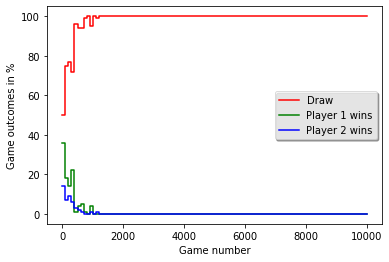

In [9]:
eval_players(Asplayer1, Asplayer2, 100)

43915

### Training of the TQPlayer

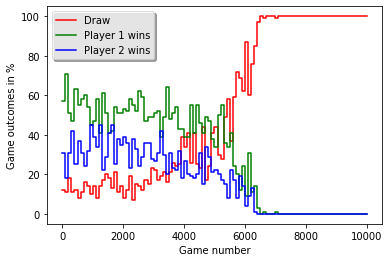

In [10]:
eval_players(TQplayer1, TQplayer2, 100)

### A battle with TQPlayer going first

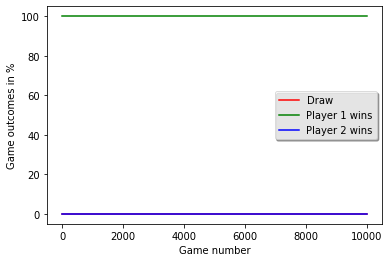

In [11]:
eval_players(TQplayer1, Asplayer2, 100)

The TQPlayer won 100% of mathches. That's weird!

### We try to make the ASPlayer going first

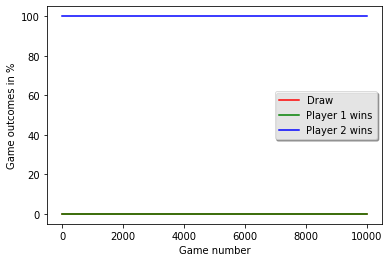

In [12]:
eval_players(Asplayer1, TQplayer2, 100)

The ASPlayer won 100% of matches. Also weird!

### Test with the reandom player

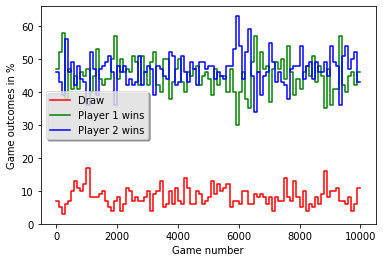

In [9]:
eval_players(Rdplayer, Asplayer2, 100)

Not what expected

### When ASPlayer goes first

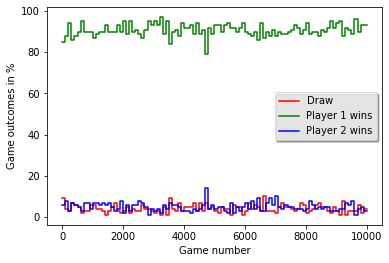

In [10]:
eval_players(Asplayer1, Rdplayer, 100)

So here the wining rate is better then for the random player going first

### Test with Minmax going first  and last

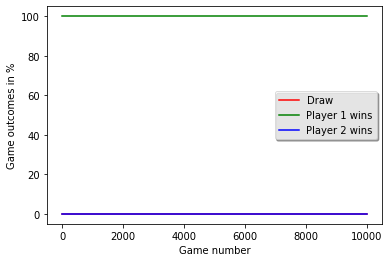

In [11]:
eval_players(MinMaxplayer, Asplayer2, 100)

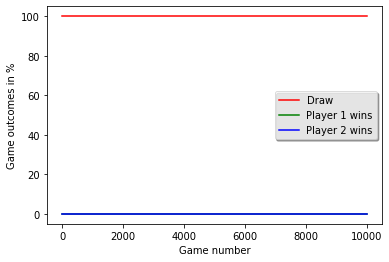

In [12]:
eval_players(Asplayer1, MinMaxplayer, 100)

In both cases the Minmax is wining 100%. Not what expected!